# Weather Type Prediction

In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
import cv2
import tqdm as tqdm
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# Input data files are available in the read-only
# running this will list all files under the input directory
import os
for dirname, _, filenames in os.walk('./dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./dataset/test.csv
./dataset/cloudy/cloudy73.jpg
./dataset/cloudy/cloudy41.jpg
./dataset/cloudy/cloudy182.jpg
./dataset/cloudy/cloudy36.jpg
./dataset/cloudy/cloudy183.jpg
./dataset/cloudy/cloudy78.jpg
./dataset/cloudy/cloudy162.jpg
./dataset/cloudy/cloudy52.jpg
./dataset/cloudy/cloudy145.jpg
./dataset/cloudy/cloudy118.jpg
./dataset/cloudy/cloudy296.jpg
./dataset/cloudy/cloudy68.jpg
./dataset/cloudy/cloudy215.jpg
./dataset/cloudy/cloudy110.jpg
./dataset/cloudy/cloudy31.jpg
./dataset/cloudy/cloudy128.jpg
./dataset/cloudy/cloudy105.jpg
./dataset/cloudy/cloudy21.jpg
./dataset/cloudy/cloudy237.jpg
./dataset/cloudy/cloudy19.jpg
./dataset/cloudy/cloudy154.jpg
./dataset/cloudy/cloudy51.jpg
./dataset/cloudy/cloudy300.jpg
./dataset/cloudy/cloudy4.jpg
./dataset/cloudy/cloudy160.jpg
./dataset/cloudy/cloudy107.jpg
./dataset/cloudy/cloudy261.jpg
./dataset/cloudy/cloudy213.jpg
./dataset/cloudy/cloudy277.jpg
./dataset/cloudy/cloudy33.jpg
./dataset/cloudy/cloudy112.jpg
./dataset/cloudy/cloudy287.jpg
./

In [14]:
root_dir = "./dataset/"
os.listdir(root_dir)

['cloudy', 'foggy', 'alien_test', 'shine', 'sunrise', 'test.csv', 'rainy']

In [16]:
foggy = "./dataset/foggy"
sunrise = "./dataset/sunrise"
shine = "./dataset/shine"
rainy = "./dataset/rainy"
cloudy = "./dataset/cloudy"
test = "./dataset/alien_test"

print("Number of Images in Each Directory:")
print(f"Foggy: {len(os.listdir(foggy))}")
print(f"Sunrise: {len(os.listdir(sunrise))}")
print(f"Shine: {len(os.listdir(shine))}")
print(f"Rainy: {len(os.listdir(rainy))}")
print(f"Cloudy: {len(os.listdir(cloudy))}")

Number of Images in Each Directory:
Foggy: 300
Sunrise: 350
Shine: 250
Rainy: 300
Cloudy: 300


## Loading images with cv2

In [17]:
x = []
y = [] 
dataset =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(150,150))
        except:
            continue
        x.append(img)
        y.append(dir_name)
    return x,y

In [18]:
x,y= create_dataset(foggy,"foggy")
x,y= create_dataset(sunrise,"sunrise")
x,y= create_dataset(shine,"shine")
x,y= create_dataset(rainy,"rainy")
x,y= create_dataset(cloudy,"cloudy")

100%|██████████| 300/300 [00:00<00:00, 876.90it/s] 


In [19]:
x =  np.array(x)
y = np.array(y)
x.shape,y.shape

((1498, 150, 150, 3), (1498,))

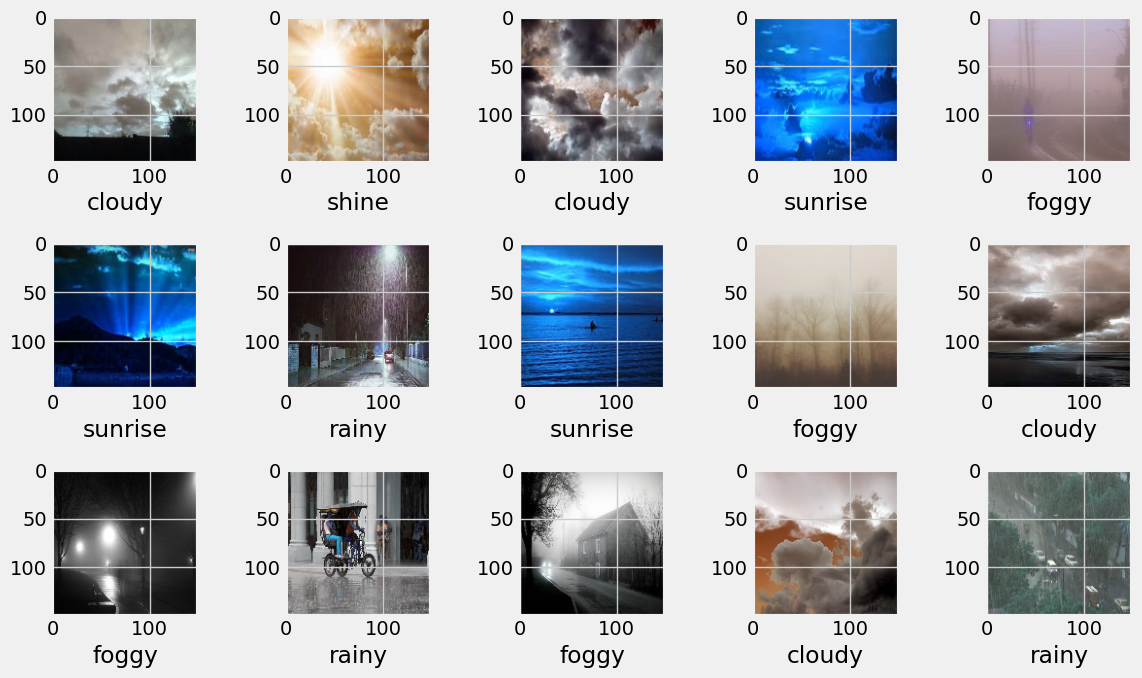

In [30]:
fig = plt.figure(figsize=(12,7))
for i in range(15):
    sample =  random.choice(range(len(x)))
    image = x[sample]
    category = y[sample]
    plt.subplot(3,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image)
    plt.xlabel(category)
    
plt.tight_layout()
plt.show()



In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

## Splitting into train/test data

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train,'\n',x_test)
print(y_train,'\n',y_test)

[[[[ 90  96  79]
   [ 94 100  83]
   [ 90  95  80]
   ...
   [ 11  16  19]
   [ 25  29  34]
   [ 26  30  35]]

  [[ 91  97  80]
   [ 92  98  81]
   [ 94  99  84]
   ...
   [ 27  32  35]
   [ 32  37  42]
   [ 33  37  43]]

  [[103 109  92]
   [ 99 105  88]
   [108 113  98]
   ...
   [ 31  37  41]
   [ 36  42  49]
   [ 37  43  50]]

  ...

  [[ 85 101  84]
   [109 131 113]
   [118 149 130]
   ...
   [ 16  29  42]
   [ 19  34  44]
   [ 19  34  43]]

  [[ 92 113  96]
   [118 144 126]
   [118 153 133]
   ...
   [ 15  29  42]
   [ 21  36  46]
   [ 21  36  45]]

  [[ 94 120 102]
   [113 143 125]
   [110 147 127]
   ...
   [ 15  29  42]
   [ 24  38  48]
   [ 23  38  47]]]


 [[[255 138  68]
   [250 130  61]
   [237 120  51]
   ...
   [199  57   2]
   [199  58   3]
   [198  59   3]]

  [[253 135  64]
   [248 130  60]
   [238 122  53]
   ...
   [199  57   2]
   [199  58   3]
   [198  59   3]]

  [[247 130  59]
   [245 129  59]
   [240 126  56]
   ...
   [200  59   2]
   [200  60   3]
   [199  61

## Creating arrays

In [34]:
img_size =150

x_train = np.array(x_train)/255.0
x_test = np.array(x_test)/255.0


x_train = x_train.reshape(-1,img_size,img_size,3)
y_train = np.array(y_train)

x_test = x_test.reshape(-1,img_size,img_size,3)
y_test = np.array(y_test)

In [36]:

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.fit_transform(y_test)
y_train_lb.shape,y_test_lb.shape

((1198, 5), (300, 5))

In [37]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

2023-03-08 13:48:16.662903: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/noetic-sierra/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-08 13:48:16.662918: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-08 13:48:16.662929: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (andromeda): /proc/driver/nvidia/version does not exist
2023-03-08 13:48:16.663045: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the ap

80134624/80134624 [==============================] - 8s 0us/step


In [38]:

for layer in vgg.layers:
    layer.trainable = False

## Creating the model

In [40]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model =Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(5,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 40965     
                                                                 
Total params: 20,065,349
Trainable params: 40,965
Non-trainable params: 20,024,384
_________________________________________________________________


In [41]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False)

earlystop = EarlyStopping(monitor="val_accuracy",patience=5,verbose=1)

unique,counts = np.unique(y_train_lb,return_counts=True)

print(unique,counts)

[0 1] [4792 1198]


In [42]:
batch_size=32
history =  model.fit(x_train,y_train_lb,epochs=15,validation_data=(x_test,y_test_lb),
                     batch_size=32 ,verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/15
38/38 [==============================] - ETA: 0s - loss: 0.9447 - accuracy: 0.6519
Epoch 1: val_accuracy improved from -inf to 0.82000, saving model to vgg19.h5
38/38 [==============================] - 56s 1s/step - loss: 0.9447 - accuracy: 0.6519 - val_loss: 0.5491 - val_accuracy: 0.8200
Epoch 2/15
38/38 [==============================] - ETA: 0s - loss: 0.4447 - accuracy: 0.8706
Epoch 2: val_accuracy improved from 0.82000 to 0.83333, saving model to vgg19.h5
38/38 [==============================] - 56s 1s/step - loss: 0.4447 - accuracy: 0.8706 - val_loss: 0.4859 - val_accuracy: 0.8333
Epoch 3/15
38/38 [==============================] - ETA: 0s - loss: 0.3366 - accuracy: 0.9098
Epoch 3: val_accuracy improved from 0.83333 to 0.85667, saving model to vgg19.h5
38/38 [==============================] - 55s 1s/step - loss: 0.3366 - accuracy: 0.9098 - val_loss: 0.4134 - val_accuracy: 0.8567
Epoch 4/15
38/38 [==============================] - ETA: 0s - loss: 0.2727 - accuracy: 0.92

In [47]:
loss,accuracy = model.evaluate(x_test,y_test_lb)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")  

10/10 [==============================] - 11s 1s/step - loss: 0.2741 - accuracy: 0.9233
Loss: 0.27408286929130554
Accuracy: 0.9233333468437195


In [48]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_pred

10/10 [==============================] - 11s 1s/step


array([2, 0, 0, 0, 3, 3, 2, 3, 4, 1, 3, 2, 0, 0, 1, 1, 2, 2, 4, 1, 4, 4,
       1, 0, 4, 4, 0, 0, 0, 3, 1, 4, 3, 0, 2, 3, 4, 4, 4, 1, 4, 3, 2, 1,
       0, 4, 2, 4, 4, 0, 2, 2, 1, 2, 4, 3, 1, 0, 1, 0, 2, 2, 0, 1, 1, 4,
       4, 1, 0, 0, 2, 2, 4, 4, 2, 4, 4, 4, 3, 4, 1, 1, 1, 3, 1, 1, 2, 0,
       3, 4, 2, 4, 2, 2, 2, 1, 4, 1, 4, 2, 1, 1, 3, 1, 0, 1, 1, 1, 1, 4,
       4, 0, 3, 4, 1, 4, 3, 0, 1, 2, 3, 4, 0, 1, 1, 2, 3, 0, 3, 1, 1, 1,
       4, 2, 4, 1, 2, 4, 2, 1, 4, 1, 0, 2, 1, 4, 4, 0, 3, 0, 2, 1, 4, 4,
       3, 0, 4, 3, 1, 4, 3, 1, 4, 1, 1, 4, 0, 0, 4, 4, 2, 4, 2, 1, 3, 4,
       2, 4, 3, 1, 2, 0, 1, 3, 3, 2, 0, 4, 4, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       2, 2, 2, 4, 0, 2, 2, 1, 2, 4, 4, 1, 3, 2, 2, 2, 0, 4, 2, 0, 0, 1,
       1, 2, 2, 2, 0, 1, 1, 0, 0, 4, 4, 2, 4, 2, 3, 0, 0, 0, 3, 4, 3, 2,
       1, 3, 3, 2, 0, 2, 1, 2, 3, 2, 2, 4, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0,
       1, 4, 1, 4, 2, 0, 1, 4, 3, 2, 3, 3, 0, 2, 2, 4, 0, 3, 0, 1, 2, 1,
       0, 1, 2, 3, 0, 1, 0, 0, 2, 4, 0, 2, 0, 4])

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        60
           1       0.79      0.96      0.87        56
           2       0.94      0.92      0.93        71
           3       0.97      0.82      0.89        45
           4       1.00      0.97      0.99        68

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300



(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

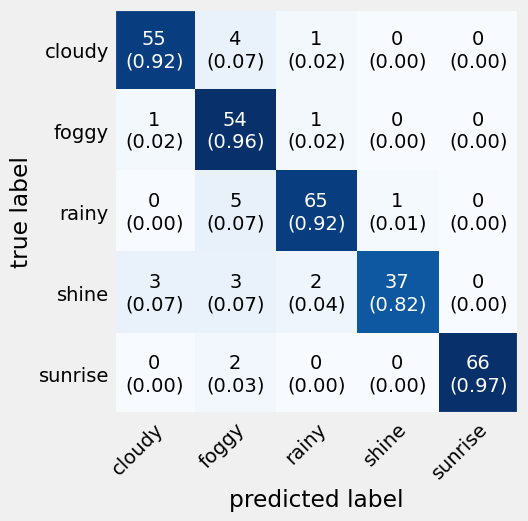

In [60]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(5,5),class_names = ["cloudy","foggy","rainy","shine","sunrise"],
                      show_normed = True)

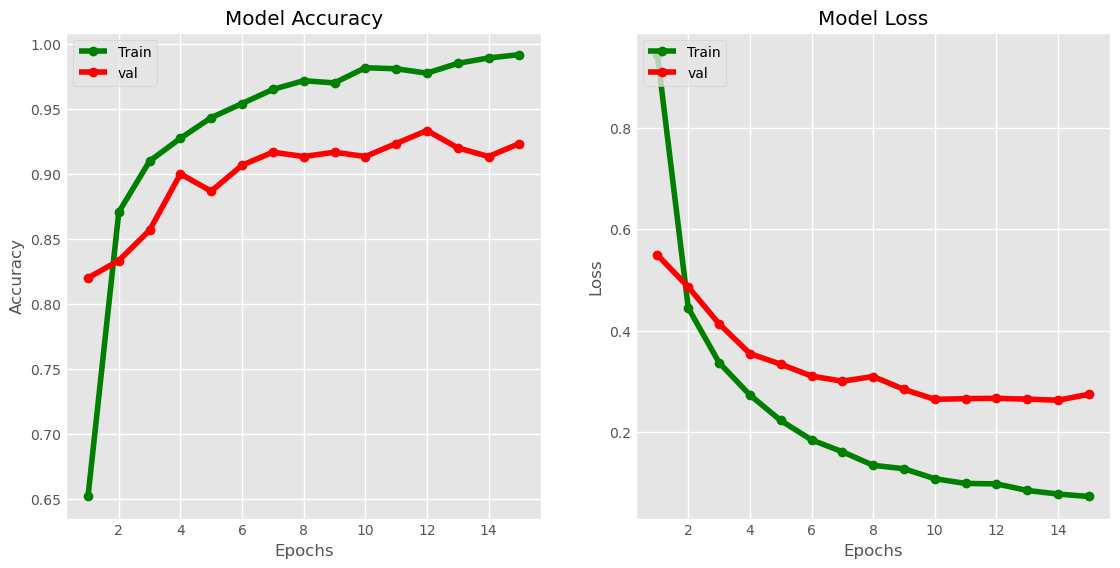

In [61]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()


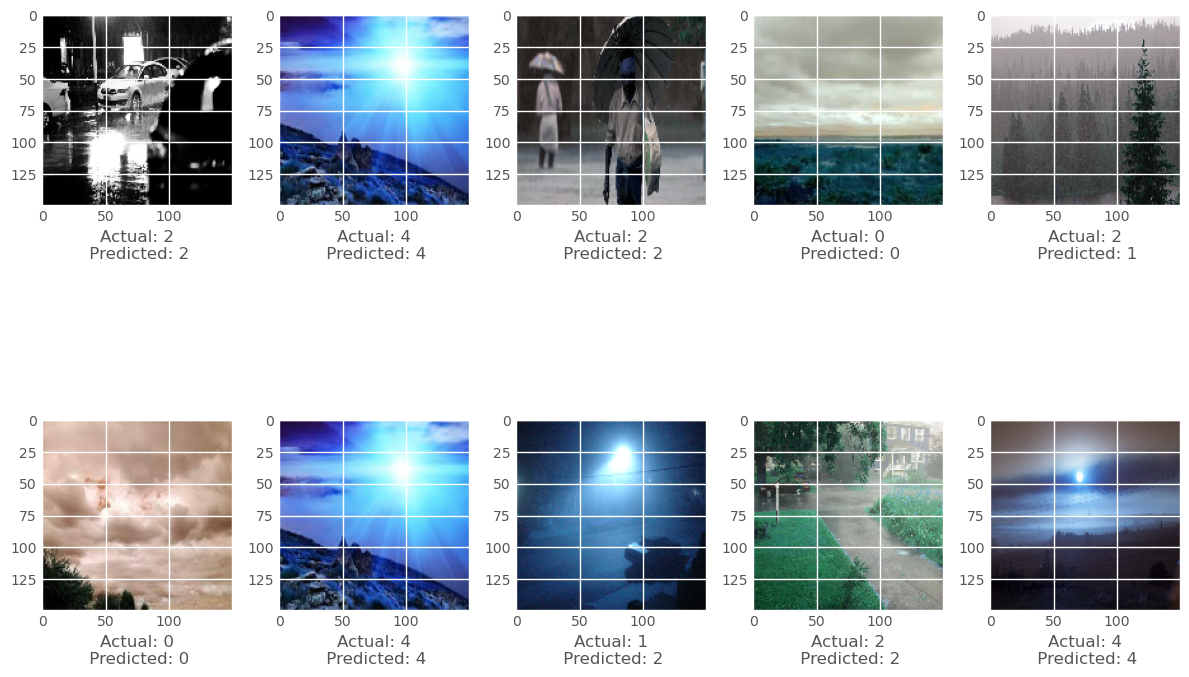

In [62]:
plt.figure(figsize=(12,9))
plt.style.use("ggplot")
for i in range(10):
    sample = random.choice(range(len(x_test)))
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(x_test[sample])
    plt.xlabel(f"Actual: {y_test[sample]}\n Predicted: {y_pred[sample]}")
    
plt.tight_layout()    
plt.show()  

In [63]:
model

In [77]:
def names(number):
    if number==0:
        return "cloudy"
    elif number==1:
        return "foggy"
    elif number==2:
        return "rainy"
    elif number==3:
        return "shine"
    elif number==4:
        return "sunrise"

from matplotlib.pyplot import imshow
def Prediction(im):
    img_size =150
    x = np.array(im.resize((img_size,img_size)))
    x = x.reshape(-1,img_size,img_size,3)
    res = model.predict_on_batch(x)
    print(res)
    classification = np.where(res == np.amax(res))[1][0]
    imshow(im)
    print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

[[0.0000000e+00 3.3598827e-04 7.4078008e-17 1.8488264e-06 9.9966216e-01]]
99.96621608734131% Confidence sunrise


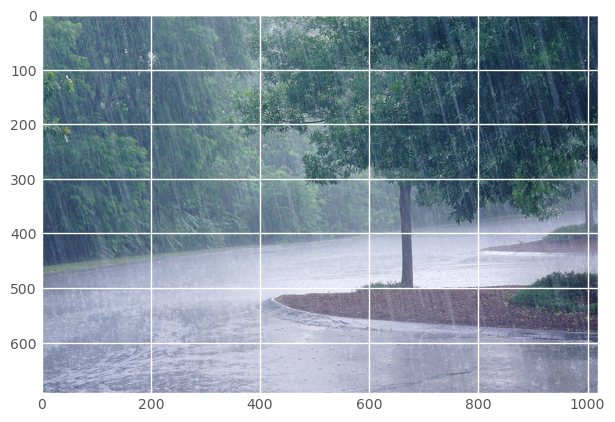

In [95]:
test_img = Image.open("./dataset/alien_test/rain_4.jpg").convert('RGB')
Prediction(test_img)